# Модуль 2. **Дослідницький аналіз даних**

## Частина друга: Аналіз файлів

In [21]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv [посилання](https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/edit#gid=1724592523) 

In [22]:
url = "https://docs.google.com/spreadsheets/d/1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ/export?format=csv&id=1bclX5PbqE8zR1-wOSM3ZTFa53sIC7RXqwty7Abmw9yQ&gid=1724592523"
df = pd.read_csv(url)
# df

#### Прочитайте отриману таблицю, використовуючи метод head

In [23]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


#### Визначте розмір таблиці за допомогою методу shape

In [24]:
print("рядків  :", df.shape[0])
print("стовпців:  ", df.shape[1])

рядків  : 8704
стовпців:   25


#### Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [25]:
df.dtypes

N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

#### Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [26]:
# ToDo - зробити таблицю з 3 колонок
print("кількість:")
print(df.isnull().sum()[1:])
print("частка:")
print(round((df.isnull().sum() / df.shape[0])[1:], 3))

кількість:
Посада                                 0
Мова програмування                  3850
Спеціалізація                       7219
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Університет                          358
Ще студент                             0
Рівень англійської                     0
Предметна область                    223
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls                                 1574
dtype

#### Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"

In [27]:
# Вибрати стовпці з пропусками
columns_mis_val = df.columns[df.isnull().any()].tolist()
print("Стовпці з пропусками", columns_mis_val, sep="\n")
# Прибрати "Мова програмування" зі списку на видалення
columns_to_del = [col for col in columns_mis_val if col != "Мова програмування"]
print("Стовпці для видалення", columns_to_del, sep="\n")
# Видалити "зайві" стовпці
df.drop(columns=columns_to_del, inplace=True)
# df.head()

Стовпці з пропусками
['Мова програмування', 'Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']
Стовпці для видалення
['Спеціалізація', 'Університет', 'Предметна область', 'Валюта', 'cls']


#### Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"

In [28]:
df.isnull().sum()[1:]

Посада                                 0
Мова програмування                  3850
Загальний досвід роботи                0
Досвід роботи на поточному місці       0
Зарплата на місяць                     0
Зміна зарплати за 12 місяців           0
Місто                                  0
Розмір компанії                        0
Тип компанії                           0
Стать                                  0
Вік                                    0
Освіта                                 0
Ще студент                             0
Рівень англійської                     0
Дата заповнення                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

#### Видаліть усі рядки у вихідній таблиці за допомогою методу dropna

In [29]:
df.dropna(axis=0, inplace=True)
# df

#### Визначте новий розмір таблиці за допомогою методу shape

In [30]:
print("рядків  :", df.shape[0])
print("стовпців:  ", df.shape[1])

рядків  : 4854
стовпців:   20


#### Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python

In [31]:
python_data = df[df["Мова програмування"] == "Python"]
python_data

,N,Посада,Мова програмування,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Стать,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,чоловіча,26,Вища,False,Pre-intermediate (нище середнього),12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,чоловіча,19,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,False,Intermediate (середній),12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,чоловіча,21,Неповна Вища,True,Upper-Intermediate (вище середнього),12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запоріжжя,до 50 осіб,Аутсорсингова,чоловіча,22,Неповна Вища,False,Intermediate (середній),10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Київ,більше 1000 осіб,Аутсорсингова,чоловіча,28,Середня,False,Intermediate (середній),11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 і більше років,менше 3 місяців,4000,1300,Віддалено,до 10 осіб,Стартап,чоловіча,33,Вища,False,Upper-Intermediate (вище середнього),11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Київ,до 50 осіб,Аутсорсингова,чоловіча,22,Вища,False,Intermediate (середній),12/07/2017 9:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


#### Визначте розмір таблиці python_data за допомогою методу shape

In [32]:
print("рядків  :", python_data.shape[0])
print("стовпців: ", python_data.shape[1])

рядків  : 207
стовпців:  20


#### Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"

In [33]:
groupby_job_title = python_data.groupby("Посада", as_index=True)
groupby_job_title.size()

Посада
Junior Software Engineer     63
Senior Software Engineer     31
Software Engineer           100
System Architect              2
Technical Lead               11
dtype: int64

#### Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"

In [34]:
group_by_salary = python_data.groupby("Посада").agg({"Зарплата на місяць": ["min", "max"]})
group_by_salary.columns = ["min", "max"]
group_by_salary

,min,max
Посада,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


#### Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"

In [35]:
salary_python = python_data.groupby('Посада').agg({'Зарплата на місяць' : ['min', 'max']})
# salary_python.columns = ['min', 'max']

def fill_avg_salary(x):
    avg = x.agg({'avg' : 'mean'})
    return avg

salary_python['avg'] = salary_python.apply(fill_avg_salary, axis = 1)
salary_python.columns = ['min', 'max', 'avg']
salary_python

,min,max,avg
Посада,,,
Junior Software Engineer,100,1250,675.0
Senior Software Engineer,1300,9200,5250.0
Software Engineer,500,5400,2950.0
System Architect,3000,5000,4000.0
Technical Lead,1425,6200,3812.5


#### Створіть описову статистику за допомогою методу describe для нового стовпчика.

In [36]:
salary_python["avg"].describe()

count       5.000000
mean     3337.500000
std      1700.091909
min       675.000000
25%      2950.000000
50%      3812.500000
75%      4000.000000
max      5250.000000
Name: avg, dtype: float64

#### Збережіть отриману таблицю в CSV файл

In [37]:
salary_python.to_csv("salary_python.csv")

## **Візуалізація**

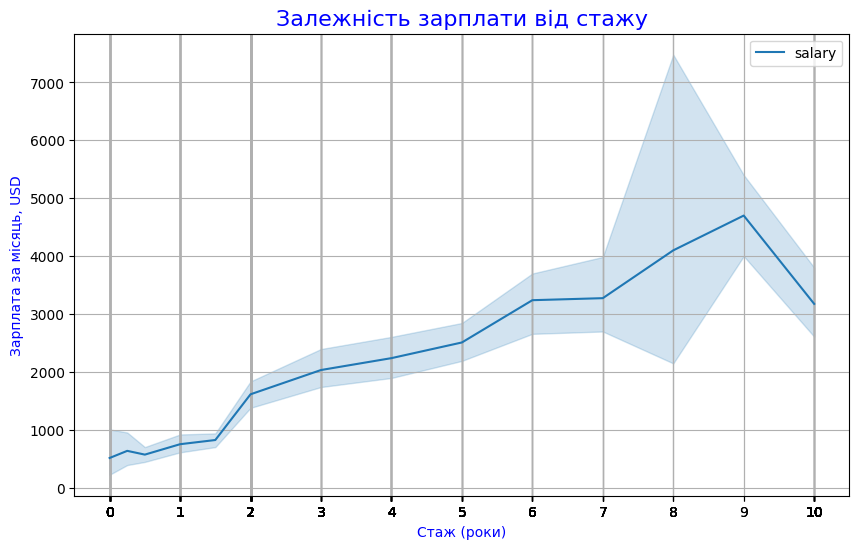

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="exp",
    y="salary",
    data=python_data[["exp", "salary"]],
)
plt.title("Залежність зарплати від стажу", color="blue", fontsize=16)
plt.xlabel("Стаж (роки)", color="blue")
plt.ylabel("Зарплата за місяць, USD", color="blue")
plt.grid()
plt.legend(["salary"], loc="best")
plt.xticks(python_data["exp"].round(0), rotation=0, ha="center", fontsize=10)
plt.show()

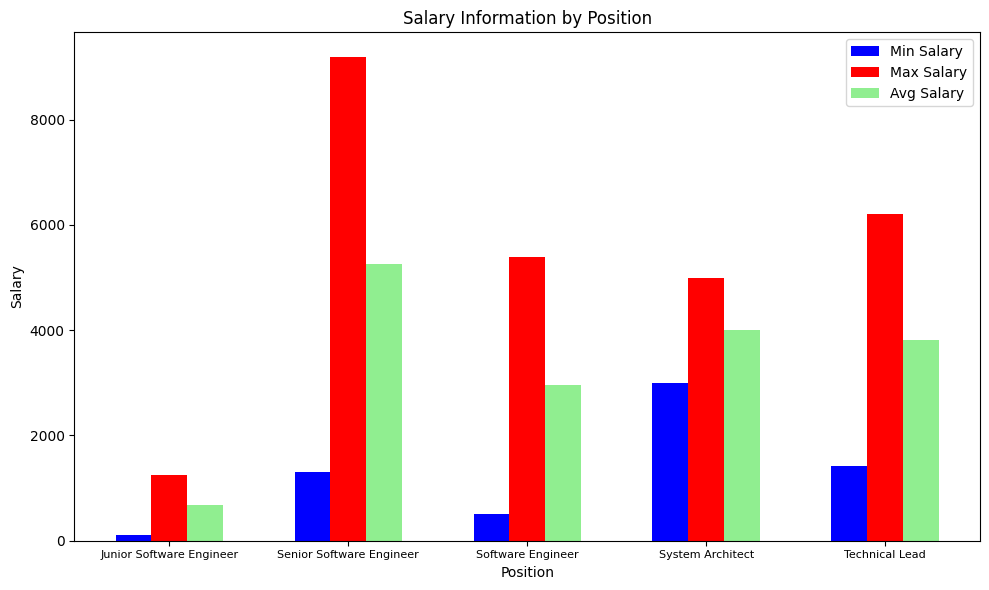

In [39]:
positions = [
    "Junior Software Engineer",
    "Senior Software Engineer",
    "Software Engineer",
    "System Architect",
    "Technical Lead",
]
min_salary = [100, 1300, 500, 3000, 1425]
max_salary = [1250, 9200, 5400, 5000, 6200]
avg_salary = [675.0, 5250.0, 2950.0, 4000.0, 3812.5]

# Plotting
x = range(len(positions))
width = 0.2

plt.figure(figsize=(10, 6))

plt.bar(x, min_salary, width, label="Min Salary", color="blue")
plt.bar([i + width for i in x], max_salary, width, label="Max Salary", color="red")
plt.bar(
    [i + width * 2 for i in x],
    avg_salary,
    width,
    label="Avg Salary",
    color="lightgreen",
)

plt.xlabel("Position")
plt.ylabel("Salary")
plt.title("Salary Information by Position")
plt.xticks([i + width for i in x], positions, rotation=0, ha="center", fontsize=8)
plt.legend()

plt.tight_layout()
plt.show()

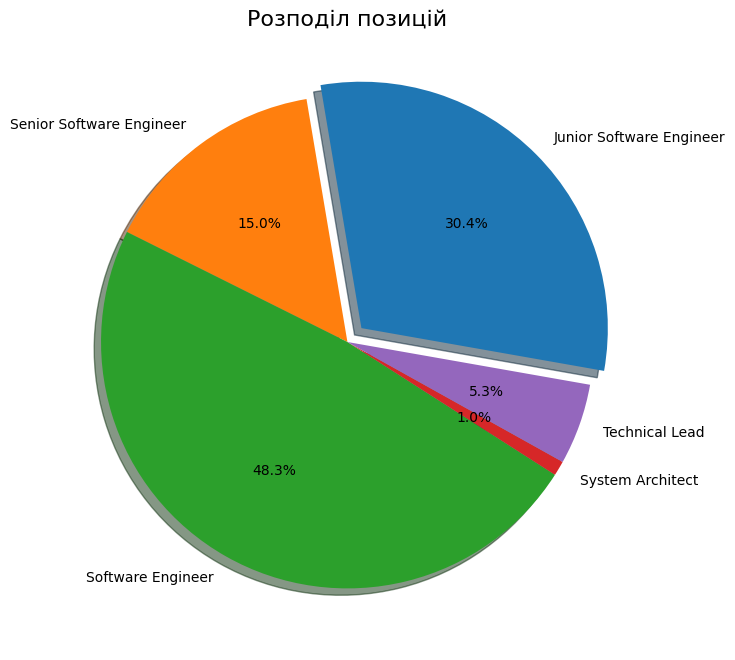

In [40]:
group_sizes = groupby_job_title.size()

explode = [0] * len(group_sizes)
explode[0] = 0.08 
explode[1] = 0.0
explode[4] = 0.0

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(
    group_sizes,
    labels=group_sizes.index,
    explode=explode,
    shadow=True,
    autopct="%1.1f%%",
    startangle=-10,
)
plt.title("Розподіл позицій", fontsize=16)

plt.show()